Moscoviense with diameter 276.0
Mapped to 10km.dat  with diamter 269.35938373048424

Orientale with diameter 294.0
Mapped to 10km.dat  with diamter 269.35938373048424

Bailly with diameter 303.0
Mapped to 10km.dat  with diamter 269.35938373048424

Schrodinger with diameter 312.0
Mapped to 15km.dat  with diamter 340.3388441351587

Planck with diameter 320.0
Mapped to 15km.dat  with diamter 340.3388441351587

Mendeleev with diameter 325.0
Mapped to 15km.dat  with diamter 340.3388441351587

Birkoff with diameter 330.0
Mapped to 15km.dat  with diamter 340.3388441351587

Harkhebi with diameter 337.0
Mapped to 15km.dat  with diamter 340.3388441351587

Nectaris with diameter 340.0
Mapped to 15km.dat  with diamter 340.3388441351587

Poincare with diameter 346.0
Mapped to 15km.dat  with diamter 340.3388441351587

Lorentz with diameter 378.0
Mapped to 15km.dat  with diamter 340.3388441351587

Humorum with diameter 420.0
Mapped to 20km.dat  with diamter 436.1039628940558

Korolev with diameter 43

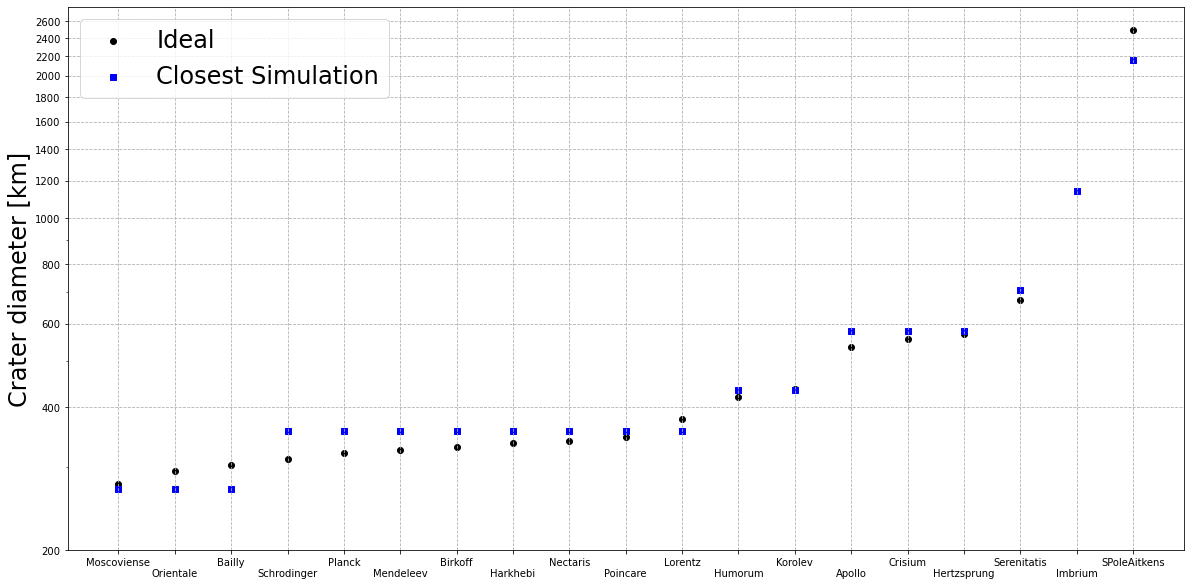

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import scipy.integrate as integrate
from function_library_3 import trim, scaling_law, asteroid_diameter
import os

fig = plt.figure(figsize=(20,10),facecolor='white')
plt.scatter([],[],color='black',marker='o',label='Ideal')
plt.scatter([],[],color='blue',marker='s',label='Closest Simulation')
plt.ylabel('Crater diameter [km]',fontsize=24)
x = 0 
names = []

#================================================================================
# Define nearest neighbor function

def nearest_neighbor(x,file_list):
    norm = np.inf
    for each in file_list: # uses the scaling law to map each basin to its respective data file
        diameter = scaling_law(asteroid_diameter('0_Prime_Data/'+each))
        if np.absolute(diameter-x) < norm:
            norm = np.absolute(diameter-x)
            closest = each
            d = diameter
    print('Mapped to '+ closest,' with diamter {}\n'.format(d))
    return closest

#================================================================================

# Open the user input file with the information from each basin
input_file = open('Basins.txt','r')
basins = []
stage,line = 1,' '
while line[0:3] != 'END':
    line = input_file.readline()
    if line[0:2] == 'LB':
        basins.append(trim(line.split(':')))  

generic_data = []
for filename in os.listdir('0_Prime_Data'):
    if filename.endswith(".dat"):
        generic_data.append(filename)    
        
for each in basins: # map each user defined basin to its closest matching premade data file
    print(each[0]+' with diameter '+str(each[1]))
    
    names.append((x%2)*'\n'+each[0])
    
    plt.scatter(x,each[1],color='black',marker='o')
    
    near_nei = nearest_neighbor(each[1],generic_data)
    
    in_ = open('0_Prime_Data/{}'.format(near_nei),'r+')
    
    plt.scatter(x,scaling_law(int(near_nei[0:-6])),color='blue',marker='s')
    plt.legend(fontsize=24)
    x += 1
    
    try:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'x')
    except:
        out_ = open('1_Basin_Data/{}.dat'.format(each[0]),'r+')
        out_.truncate(0)
    param = eval(in_.readline())
    new_param = []
    for j in range(5):
        new_param.append(param[j])
    new_param.append(scaling_law(each[1],inverse=True)/2)
    new_param.append(param[6])
    new_param.append([each[2],each[3]])
    new_param.append(each[1]/2)
    out_.write(str(new_param)+'\n')
    for i in range(17):
        out_.write(in_.readline())
    in_.close() ; out_.close()

plt.yscale('log')
plt.xticks(list(range(x)),names)
plt.yticks(list(range(200,2800,200)),list(range(200,2800,200)))
plt.grid(True, ls='--', zorder=-15);

Text(0, 0.5, 'Latitude [degrees]')

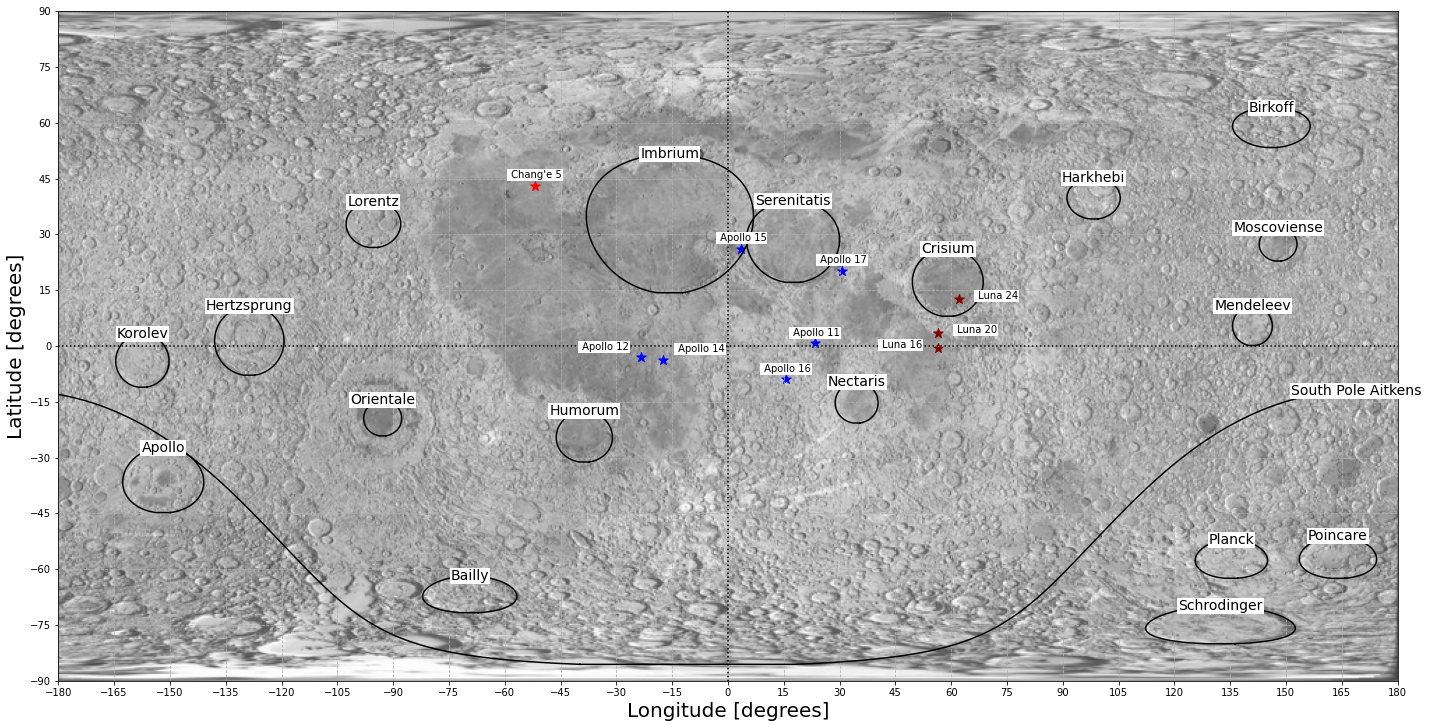

In [5]:
R_planet = 1750

A_sites = {11:[0.67409,23.47298],12:[-3.01381,-23.41930],14:[-3.64544,-17.47139],15:[26.13224,3.63400],16:[-8.97341,15.49859],17:[20.18809,30.77475]}
L_sites = {16:[-.5137,56.3638],20:[3.5333,56.55],24:[12.7145,62.2129]}
C_sites = {5:[43.1,-51.8]}


def solve(R_basin,lam1,lam2):
    numer = 2*(np.sin(R_basin/(2*R_planet)))**2 -1 + np.cos(lam1-lam2) - np.cos(lam1)*np.cos(lam2)
    denom = -np.cos(lam1)*np.cos(lam2)
    return np.arccos(numer/denom)

def process(x_prime,y_prime,phi1):
    xs = [] ; ys = []
    for i in range(len(x_prime)):
        x = (phi1+x_prime[i]+np.pi)%(2*np.pi) - np.pi
        if i!=0 and xs[-1]:
            if xs[-1]*x < 0 and xs[-1] < x:
                xs.append(None) ; ys.append(None)
        xs.append(np.degrees(x))  
        ys.append(np.degrees(y_prime[i]))
    for i in range(len(x_prime)):
        x = (phi1-x_prime[-i-1]+np.pi)%(2*np.pi) - np.pi
        if xs[-1]:
            if xs[-1]*x < 0 and xs[-1] < x:
                xs.append(None) ; ys.append(None)
        xs.append(np.degrees(x))  
        ys.append(np.degrees(y_prime[-i-1]))
    
    del xs[0] ; del ys[0]
    del xs[-1] ; del ys[-1]    
    xs.append(xs[0]) ; ys.append(ys[0])
    
    return xs,ys
    
fig = plt.figure(figsize=(24,24),facecolor='white')
ax = fig.add_subplot(111,aspect='equal')

img = plt.imread("Mercator.png")
ax.imshow(img, extent=[-180, 180, -90, 90], alpha=.75)

ax.plot([0,0], [-180,180], ls=':', color='black')
ax.plot([-180,180], [0,0], ls=':', color='black')

for each in A_sites.keys():
    fix = 0
    if each == 14:
        fix = 10
    if each == 12:
        fix = -10
    ax.text(A_sites[each][1]+fix,A_sites[each][0]+2,' Apollo '+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(A_sites[each][1],A_sites[each][0],marker='*',s=100,c='blue')
    
for each in L_sites.keys():
    fix = 10
    if each == 16:
        fix *= -1
    ax.text(L_sites[each][1]+fix,L_sites[each][0],' Luna '+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(L_sites[each][1],L_sites[each][0],marker='*',s=100,c='maroon')
    
for each in C_sites.keys():
    ax.text(C_sites[each][1],C_sites[each][0]+2," Chang'e "+str(each),fontsize=10, ha='center', bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1})
    ax.scatter(C_sites[each][1],C_sites[each][0],marker='*',s=100,c='red')

def transform(x,lam_min,lam_max):
    k   = 5
    L   = lam_max - lam_min
    return L * ( 1 + np.exp(-k*x) )**-1 + lam_min
    
for each in basins:
    name = each[0]
    if name == 'SPoleAitkens':
        name = 'South Pole Aitkens'
    R_basin = each[1]/2
    lam1 = np.radians(each[2])
    phi1 = np.radians(each[3])
        
    lam_max = lam1 + R_basin/R_planet
    if lam_max > np.pi/2:
        lam_max = np.pi - lam_max
    
    lam_min = lam1 - R_basin/R_planet
    if lam_min < -np.pi/2:
        lam_min = -np.pi - lam_min
        
    latitudes = transform(np.linspace(-1,1,1000),lam_min,lam_max)
    
    ax.text(np.degrees(phi1),np.degrees(lam_max),name,fontsize=14, bbox={'facecolor':'white','alpha':1,'edgecolor':'none','pad':1},ha='center', va='center')
   
    x_prime = [] ; y_prime = []
    for lam2 in latitudes:
        lat  = lam2
        D_long = solve(R_basin,lam1,lam2)
        x_prime.append(D_long)
        y_prime.append(lat)
    
    xs,ys = process(x_prime,y_prime,phi1)
    
    ax.plot(xs,ys,c='black')
    

ax.grid(True, ls='--', zorder=-15);
ax.set_xlim(-180,180);
ax.set_ylim(-90,90);

ax.set_yticks([-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90])
ax.set_xticks([-180,-165,-150,-135,-120,-105,-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90,105,120,135,150,165,180])

ax.set_xlabel("Longitude [degrees]",fontsize=20)
ax.set_ylabel("Latitude [degrees]" ,fontsize=20)